# Laboratorium 4 - MOFIT

## Zastosowanie schematu Metropolisa: model Isinga 2D


### Krzysztof Tondera

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import random
sns.set()

#start = time.time()
#end = time.time()
#print("{} s".format(end - start))

## Siatka $2^n x 2^n$ zlokalizowanych spinów $\frac{1}{2}$

In [2]:
class lattice:
    
    def __init__(self,n,mu_B,J):
        self.n=n
        self.mu_B=mu_B
        self.J=J
    
    dim=2**7
        
    state = np.ones(shape=(dim,dim))
    
    def show(self):
        fig, ax = plt.subplots(constrained_layout=True)
        cs = ax.contourf(self.state,cmap="bwr",levels=1)
        cbar = fig.colorbar(cs)
        plt.title("Ising Model")
        plt.show()
        
    def energy(self):
        E=0
        for i in range(self.dim):
            for j in range(self.dim):
                S=self.state[i,j]
                nb = self.state[(i+1)%self.dim, j] + self.state[i,(j+1)%self.dim] + self.state[(i-1)%self.dim, j] + self.state[i,(j-1)%self.dim]
                E += -self.J*nb*S-self.mu_B*self.state[i,j]
        return E/2/(2**(2*self.n))
    
    def metropolis_algorithm(self,kT_max):
        
        kT_tab=np.linspace(0.01,kT_max,100)
        E=self.energy()
        M=0
        
        avg_E=[]
        M_tab=[]
        
        start = time.time()
        for kT in kT_tab:
            for i in range(30000):
                a=np.random.randint(0, self.dim)
                b=np.random.randint(0, self.dim)

                sn = self.state[(a+1)%self.dim, b] + self.state[a,(b+1)%self.dim] + self.state[(a-1)%self.dim, b] + self.state[a,(b-1)%self.dim]
                dE=2*self.mu_B*self.state[a][b]+2*self.J*self.state[a][b]*sn

                if random.random() < np.exp(-dE/kT):
                    #print(E,dE)
                    E=E+dE
                    self.state[a,b]*=-1
           
            
            M=sum(sum(self.state)) 
            avg_E.append(E)
            M_tab.append(M)
        end = time.time() 
        print("{} s".format(end - start))
        return avg_E,M_tab,kT_tab 

## Zadania

In [3]:
a=lattice(7,0.1,100)
E,M,kT=a.metropolis_algorithm(1000)

90.22697329521179 s


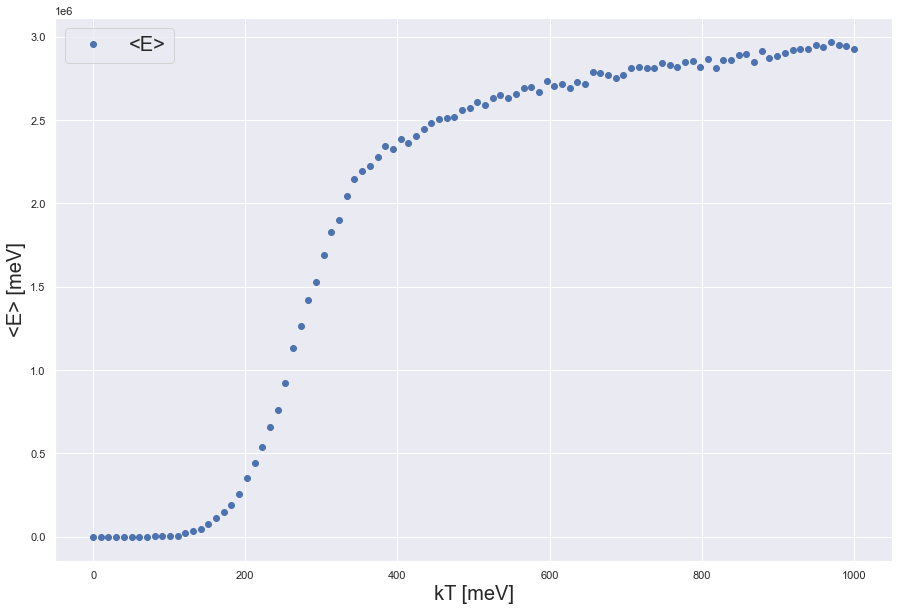

In [4]:
plt.rc('font',size=10)
plt.figure(figsize=(15, 10))
plt.plot(kT,E,'o',label='<E>')
plt.xlabel("kT [meV]",fontsize=20)
plt.ylabel("<E> [meV]",fontsize=20)
plt.legend(fontsize=20)
plt.show()

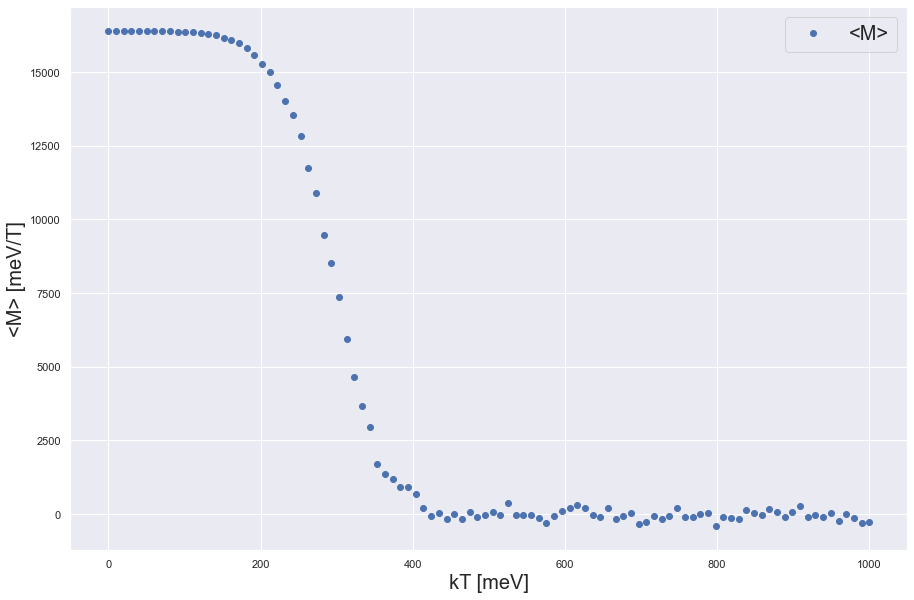

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(kT,M,'o',label='<M>')
plt.xlabel("kT [meV]",fontsize=20)
plt.ylabel("<M> [meV/T]",fontsize=20)
plt.legend(fontsize=20)
plt.show()

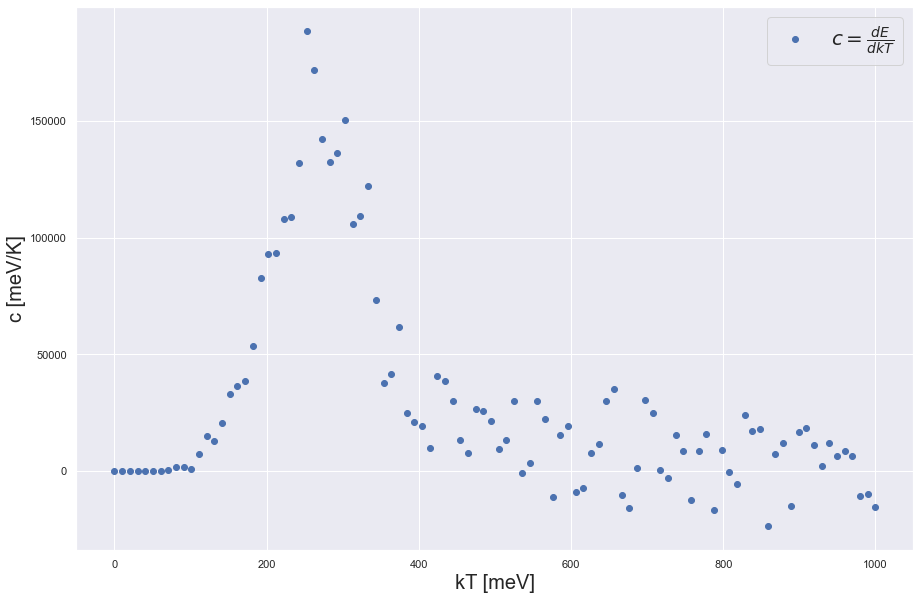

In [6]:
c=np.gradient(E)
plt.figure(figsize=(15, 10))
plt.plot(kT,c,'o',label=r'$c=\frac{dE}{dkT}$')
plt.xlabel("kT [meV]",fontsize=20)
plt.ylabel("c [meV/K]",fontsize=20)
plt.legend(fontsize=20)
plt.show()